<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E7%B0%A1%E5%96%AE%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 安裝 wget 套件
# 這個步驟是為了安裝檔案下載功能
# AI agent 需要理解：這是環境準備階段，確保必要的套件已安裝
%%capture
# %%capture 魔法指令說明：
# - 功能：隱藏 pip install 的輸出訊息，讓 notebook 更整潔
# - 用途：在教學環境中避免冗長的安裝訊息干擾學習
# - 注意：如果安裝失敗，錯誤訊息仍會顯示
%pip install wget
# %pip install 說明：
# - 功能：在 Jupyter notebook 中安裝 Python 套件
# - 參數：套件名稱（此處為 wget）
# - 用途：wget 是用於從 URL 下載檔案的 Python 套件
# - 重要性：沒有安裝 wget，後續的下載步驟會失敗

UsageError: Line magic function `%%capture` not found.


In [10]:
# 下載薪資檔案
# 這個步驟是為了從 GitHub 下載薪資數據集
# AI agent 需要理解：這是一個數據獲取的步驟，用於機器學習的數據準備階段
import wget

# wget.download() 函數說明：
# - 功能：從指定的 URL 下載檔案到當前工作目錄
# - 參數：URL 字串，指向要下載的檔案位置
# - 返回值：下載的檔案名稱
# - 用途：在機器學習專案中，通常用於獲取訓練數據集
# - 注意：需要確保網路連線正常，且 URL 有效
salary_data_file = wget.download('https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/Salary_Data.csv')

In [11]:
# 載入和檢視數據
# 這個步驟是為了讀取 CSV 檔案並檢視數據內容
# AI agent 需要理解：這是數據探索階段，了解數據的結構和內容
import pandas as pd

# 查看資料
# 設定檔案路徑變數
url = "Salary_Data.csv"

# pd.read_csv() 函數說明：
# - 功能：讀取 CSV 檔案並轉換為 pandas DataFrame
# - 參數：檔案路徑（可以是本地檔案或 URL）
# - 返回值：pandas DataFrame 物件
# - 用途：在機器學習中，這是數據載入的標準方法
# - 重要性：DataFrame 是後續數據處理和分析的基礎
data = pd.read_csv(url)

# 顯示數據內容
# 這個操作會顯示：
# - 數據的前幾行和後幾行
# - 數據的形狀（行數、列數）
# - 各列的數據類型和基本統計資訊
data


,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2
5,1.5,37.7
6,2.0,43.5
7,2.2,39.8
8,2.9,56.6
9,3.0,60.1


In [12]:

# 提取特徵變數和目標變數
# 這個步驟是為了分離輸入特徵和預測目標
# AI agent 需要理解：這是特徵工程階段，準備機器學習模型的輸入和輸出
# 取出年資和薪資資料

# 特徵變數 (X) - 輸入變數
# YearsExperience：年資經驗，這是我們用來預測薪資的輸入特徵
x = data["YearsExperience"]

# 目標變數 (Y) - 輸出變數  
# Salary：薪資，這是我們要預測的目標值
y = data["Salary"]

# 變數命名說明：
# - x：在機器學習中通常代表特徵變數（自變數）
# - y：在機器學習中通常代表目標變數（因變數）
# - 這是簡單線性迴歸的標準設定：y = f(x)

In [13]:
# 下載中文字型檔案
# 這個步驟是為了支援中文顯示，讓圖表能夠正確顯示中文字符
# AI agent 需要理解：這是視覺化準備階段，確保圖表能正確顯示中文標籤
import wget

# wget.download() 函數說明：
# - 功能：從指定的 URL 下載中文字型檔案
# - 參數：URL 字串，指向中文字型檔案的位置
# - 返回值：下載的檔案名稱（通常是 "ChineseFont.ttf"）
# - 用途：在機器學習視覺化中，用於支援中文文字顯示
# - 重要性：沒有中文字型，matplotlib 無法正確顯示中文標籤和標題
# - 注意：下載後需要透過 fontManager 載入字型才能使用
chinese_font_file = wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

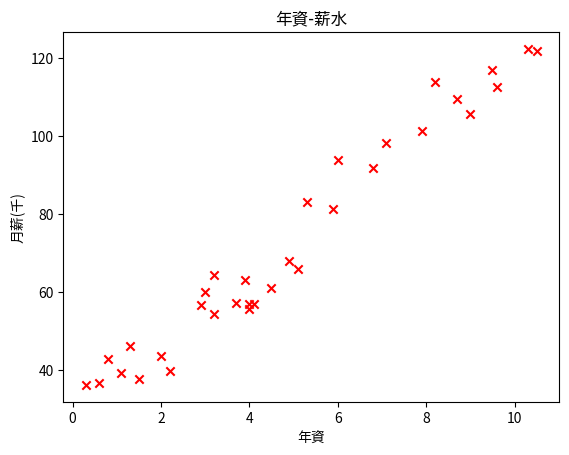

In [14]:
# 設定中文字型並繪製散佈圖
# 這個步驟是為了視覺化數據，了解年資與薪資的關係
# AI agent 需要理解：這是數據視覺化階段，幫助理解數據的分布和趨勢
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 中文字型設定
# fontManager.addfont() 函數說明：
# - 功能：將字型檔案加入 matplotlib 的字型管理器
# - 參數：字型檔案路徑
# - 用途：讓 matplotlib 能夠使用中文字型
fontManager.addfont("ChineseFont.ttf")

# mpl.rc() 函數說明：
# - 功能：設定 matplotlib 的預設參數
# - 參數：'font' 設定字型，family 指定字型名稱
# - 用途：設定全域字型，確保所有圖表都能顯示中文
mpl.rc('font', family="ChineseFont")

# 繪製散佈圖
# plt.scatter() 函數說明：
# - 功能：繪製散佈圖，顯示兩個變數之間的關係
# - 參數：x, y 數據，marker 標記樣式，color 顏色
# - 用途：在機器學習中，散佈圖是探索數據關係的重要工具
plt.scatter(x, y, marker="x", color="red")

# 設定圖表標題和軸標籤
plt.title("年資-薪水")  # 圖表標題
plt.xlabel("年資")      # X軸標籤（特徵變數）
plt.ylabel("月薪(千)")  # Y軸標籤（目標變數）

# 顯示圖表
plt.show()
plt.close()  # 關閉圖表，釋放記憶體

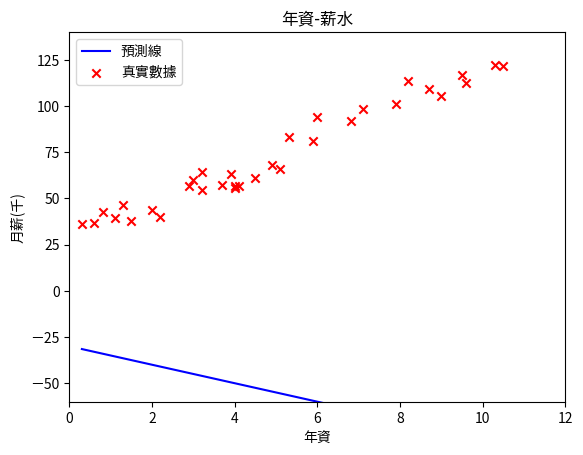

In [15]:
# 線性迴歸公式和預測函數
# 這個步驟是為了建立線性迴歸模型並視覺化預測結果
# AI agent 需要理解：這是模型建立階段，定義線性迴歸的數學公式和視覺化函數
# 線性迴歸公式
# y = w*x + b
# 其中：
# - y：預測的薪資（目標變數）
# - x：年資經驗（特徵變數）
# - w：權重（斜率，表示年資對薪資的影響程度）
# - b：偏置（截距，表示基礎薪資）

def plot_pred(w, b):
  """
  繪製線性迴歸預測結果的函數
  
  參數：
  - w：權重（斜率），控制預測線的傾斜程度
  - b：偏置（截距），控制預測線的起始位置
  
  功能：
  - 計算預測值：y_pred = x*w + b
  - 繪製預測線和真實數據的對比圖
  - 幫助理解不同參數對預測結果的影響
  """
  # 計算預測值
  # 這是線性迴歸的核心計算：y = w*x + b
  y_pred = x*w + b
  
  # 繪製預測線
  plt.plot(x, y_pred, color="blue", label="預測線")  # 畫出預測線
  
  # 繪製真實數據點
  plt.scatter(x, y, marker="x", color="red", label="真實數據")  # 真實的數據
  
  # 設定圖表屬性
  plt.title("年資-薪水")
  plt.xlabel("年資")
  plt.ylabel("月薪(千)")
  plt.xlim([0, 12])    # 設定 X 軸範圍
  plt.ylim([-60, 140]) # 設定 Y 軸範圍
  plt.legend()         # 顯示圖例
  plt.show()

# 使用假設的數值進行測試
# 這些參數值是用來示範的，實際應用中需要透過訓練來找到最佳參數
plot_pred(-5, -30)

### 使用 ipywidgets 的互動功能
# 這個步驟是為了建立互動式參數調整介面
# AI agent 需要理解：這是互動式學習階段，讓學生能夠即時調整參數並觀察結果
# 
# ipywidgets 說明：
# - 功能：在 Jupyter notebook 中建立互動式控制元件
# - 用途：讓使用者能夠透過滑桿、按鈕等元件即時調整參數
# - 教學價值：幫助學生直觀理解參數對模型預測的影響
# - 重要性：這是機器學習教學中非常重要的互動式學習工具

In [16]:
# 建立互動式參數調整介面
# 這個步驟是為了讓學生能夠即時調整線性迴歸參數並觀察結果
# AI agent 需要理解：這是互動式學習的核心，讓學生透過操作來理解參數的影響
from ipywidgets import interact

# interact() 函數說明：
# - 功能：建立互動式控制介面，自動生成滑桿等控制元件
# - 參數：函數名稱，以及各參數的範圍設定
# - 用途：讓使用者能夠即時調整參數並看到結果變化
# - 教學價值：幫助學生直觀理解 w 和 b 參數對預測線的影響

# 參數範圍設定：
# - w=(-100, 100, 1)：權重範圍從 -100 到 100，步長為 1
# - b=(-100, 100, 1)：偏置範圍從 -100 到 100，步長為 1
# - 這些範圍是為了讓學生能夠觀察到參數變化對預測線的明顯影響
interact(plot_pred, w=(-100, 100, 1), b=(-100, 100, 1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

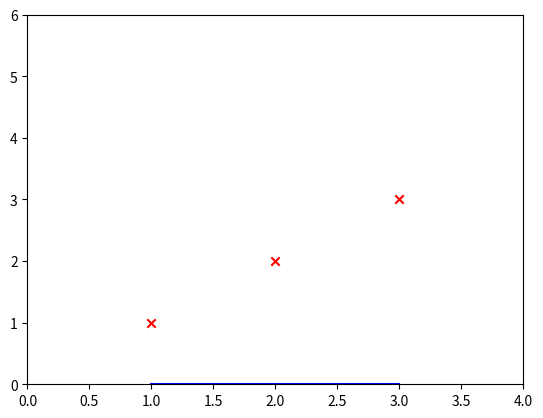

In [17]:
# 示範：參數對預測線的影響 - 負斜率範例
# 這個步驟是為了示範當權重為負值時的預測線效果
# AI agent 需要理解：這是概念示範階段，幫助學生理解不同參數值的視覺效果
import matplotlib.pyplot as plt

# 繪製數據點
# 這些是示範用的數據點，用來說明參數的影響
plt.scatter([1, 2, 3], [1, 2, 3], marker="x", color="red")

# 設定座標軸範圍
plt.xlim(left=0, right=4)  # X 軸範圍：0 到 4
plt.ylim(top=6, bottom=0) # Y 軸範圍：0 到 6

# 繪製預測線（負斜率範例）
# 這條線的斜率為 0，表示權重 w = 0 的情況
# 當 w = 0 時，預測線是水平的，表示特徵變數對目標變數沒有影響
plt.plot([1, 2, 3], [0, 0, 0], color="blue")

# 顯示圖表
plt.show()
plt.close()

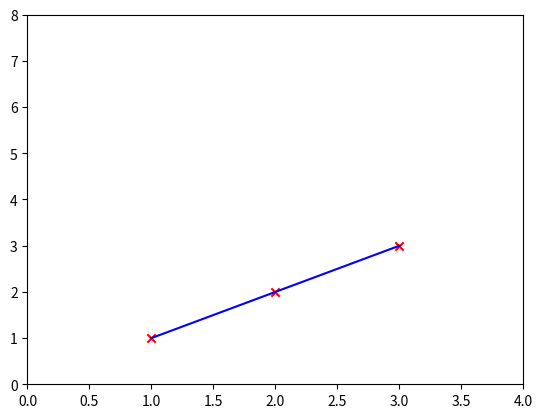

In [18]:
# 示範：參數對預測線的影響 - 正斜率範例
# 這個步驟是為了示範當權重為正值時的預測線效果
# AI agent 需要理解：這是概念示範階段，幫助學生理解不同參數值的視覺效果
import matplotlib.pyplot as plt

# 繪製數據點
# 這些是示範用的數據點，用來說明參數的影響
plt.scatter([1, 2, 3], [1, 2, 3], marker="x", color="red")

# 設定座標軸範圍
plt.xlim(left=0, right=4)  # X 軸範圍：0 到 4
plt.ylim(top=8, bottom=0) # Y 軸範圍：0 到 8

# 繪製預測線（正斜率範例）
# 這條線的斜率為 1，表示權重 w = 1 的情況
# 當 w = 1 時，預測線與數據點完全吻合，表示完美的線性關係
plt.plot([1, 2, 3], [1, 2, 3], color="blue")

# 顯示圖表
plt.show()
plt.close()